# Insper: Profa Maria Kelly Venezuela

# Ciência dos dados: Engenharias

# Projeto 3: PNADC - Uso dos microdados de 2023

# Grupo: Danilo Ramos, Leonardo Veras e Thomas Ganut
___


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

___
## A. Introdução

### Objetivo escolhido:

O **tema** escolhido pelo grupo é como a classe social e a área de atuação podem determinar o salário de um indíviduo.
<br><br>

O ***target*** escolhido pelo grupo é "Qual era o rendimento bruto/retirada mensal que ... recebia/fazia normalmente nesse trabalho? (valor em dinheiro)" (variável V403312 - quantitativa).

O grupo dividiu as ***features*** escolhidas para o projeto em três temas, sendo estes "Classe social", "Área de atuação" e "Classificações gerais".

#### Classe social
- Cor ou raça (V2010)
- ... sabe ler e escrever? (V3001)
- A escola que ... frequenta é de (V3002A)
- Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental -  SISTEMA DE 9 ANOS (VD3004)

#### Área de atuação
- Na semana de ... a ... (semana de  referência), ... tinha pelo menos um sócio que trabalhava nesse negócio/empresa? (V4017)
- Então onde ... exercia normalmente esse trabalho? (V4022)
- Nesse trabalho, ... tinha carteira de trabalho assinada? (V4029)

#### Classificações gerais
- Unidade da Federação (UF)
- Tipo de área (V1023)
- Idade do morador na data de referência (V2009)

___
# Leitura da base de dados - PNADC 2023:

In [69]:
df = pd.read_csv('output.csv')

In [70]:
# Mudando o tipo para 'category'
colunas = ['Estado', 'AreaRes', 'CorRaca', 'Analfabeto', 'Socios', 'TipoTrabalho', 'Carteira', 'Instrucao']
for coluna in colunas:
    df[coluna] = df[coluna].astype('category')

# Renomeando as categorias
df['Estado'] = df['Estado'].cat.rename_categories({
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins', 
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo', 
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
})

df['AreaRes'] = df['AreaRes'].cat.rename_categories({
    1: 'Capital', 2: "Resto da RM", 3: 'Resto da RIDE', 4: 'Resto da UF' # RIDE = Região Integrada de Desenvolvimento Econômico
})

df['CorRaca'] = df['CorRaca'].cat.rename_categories({
    1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indigena', 9: 'Ignorado' 
})

df['Analfabeto'] = df['Analfabeto'].cat.rename_categories({
    1: 'Não', 2: 'Sim'
})

df['Socios'] = df['Socios'].cat.rename_categories({
    1: 'Sim', 2: 'Nao'
})

df['TipoTrabalho'] = df['TipoTrabalho'].cat.rename_categories({
    1: 'Em outro negócio/empresa',
    2: 'Em local designado',
    3: 'Em domicílio de empregador',
    4: 'No domicílio, em local exclusivo',
    5: 'No domicílio, sem local exclusivo',
    6: 'Em veículo automotor',
    7: 'Em via ou área pública',
    8: 'Em outro local',
    9: 'Não aplicável'
})


df['Carteira'] = df['Carteira'].cat.rename_categories({
    1: 'Sim', 2: 'Nao'
})

df['Instrucao'] = df['Instrucao'].cat.rename_categories({
    1: '<1 ano', 2: 'Fund. incompleto', 3: 'Fund. completo', 4: 'EM incompleto', 5: 'EM completo', 6: 'Sup. incompleto', 7: 'Sup. completo', 
})

In [71]:
df['Estado'] = pd.Categorical(df['Estado'], categories=[
    'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 
    'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 
    'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 
    'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
    'Distrito Federal'
], ordered=False)

df['AreaRes'] = pd.Categorical(df['AreaRes'], categories=[
    'Capital', 'Resto da RM', 'Resto da RIDE', 'Resto da UF'
], ordered=False)

df['CorRaca'] = pd.Categorical(df['CorRaca'], categories=[
    'Branca', 'Preta', 'Amarela', 'Parda', 'Indigena', 'Ignorado'
], ordered=False)

df['Analfabeto'] = pd.Categorical(df['Analfabeto'], categories=[
    'Não', 'Sim'
], ordered=False)

df['Socios'] = pd.Categorical(df['Socios'], categories=[
    'Sim', 'Nao'
], ordered=False)

df['TipoTrabalho'] = pd.Categorical(df['TipoTrabalho'], categories=[
    'Em outro negócio/empresa', 'Em local designado', 'Em domicílio de empregador', 
    'No domicílio, em local exclusivo', 'No domicílio, sem local exclusivo', 
    'Em veículo automotor', 'Em via ou área pública', 'Em outro local', 'Não aplicável'
], ordered=False)

df['Carteira'] = pd.Categorical(df['Carteira'], categories=[
    'Sim', 'Nao'
], ordered=False)

df['Instrucao'] = pd.Categorical(df['Instrucao'], categories=[
    '<1 ano', 'Fund. incompleto', 'Fund. completo', 'EM incompleto', 'EM completo', 
    'Sup. incompleto', 'Sup. completo'
], ordered=True)

df

,Estado,AreaRes,Idade,CorRaca,Analfabeto,Socios,TipoTrabalho,Carteira,Salario,Instrucao
0,Rondônia,Capital,30,Parda,Não,Nao,Em via ou área pública,NaN,5000.0,EM completo
1,Rondônia,Capital,29,Parda,Não,NaN,NaN,NaN,NaN,EM completo
2,Rondônia,Capital,50,Parda,Não,NaN,NaN,NaN,3500.0,Sup. completo
3,Rondônia,Capital,25,Parda,Não,NaN,NaN,NaN,NaN,EM completo
4,Rondônia,Capital,2,Parda,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
473330,Distrito Federal,Capital,84,Parda,Não,NaN,NaN,NaN,NaN,Fund. incompleto
473331,Distrito Federal,Capital,47,Branca,Não,NaN,"No domicílio, sem local exclusivo",Nao,8000.0,Sup. completo
473332,Distrito Federal,Capital,11,Branca,Não,NaN,NaN,NaN,NaN,Fund. incompleto
473333,Distrito Federal,Capital,54,Parda,Não,NaN,NaN,Sim,1500.0,EM incompleto


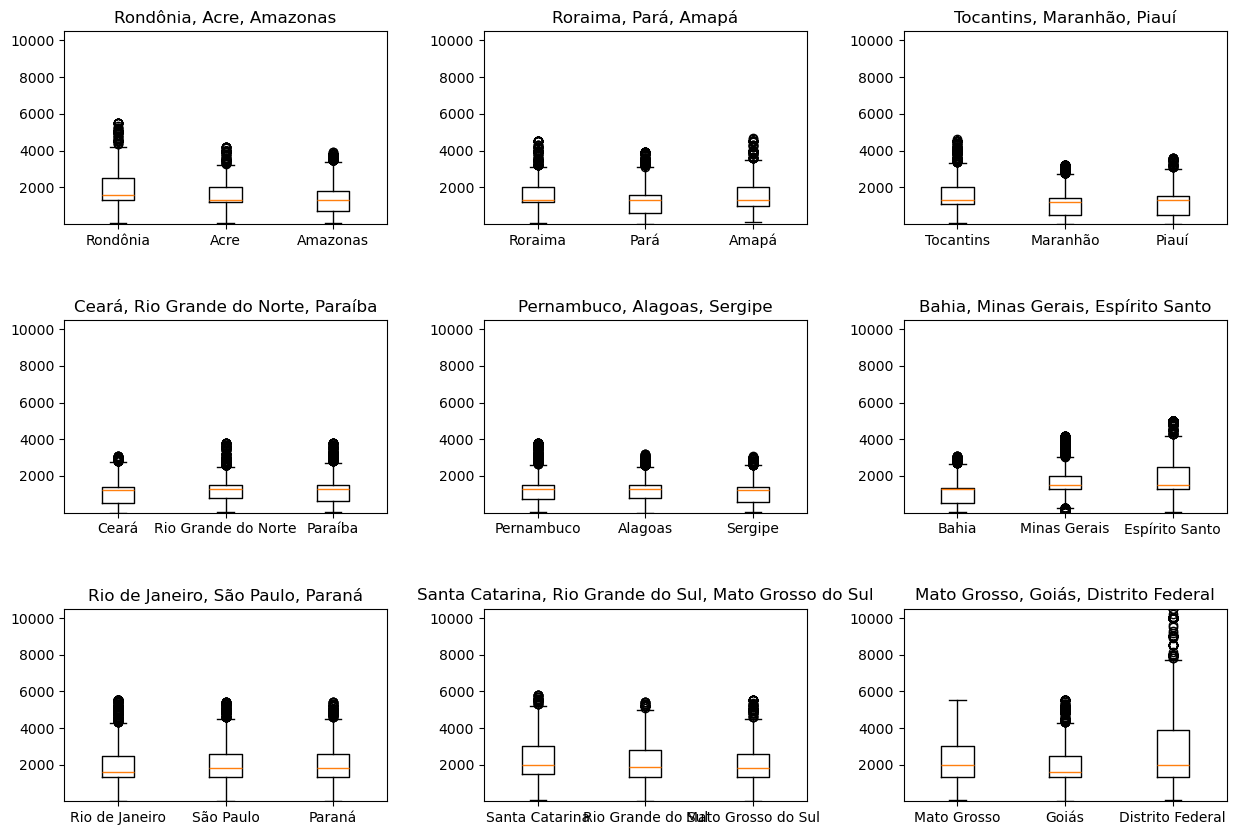

In [93]:
# Lista de estados
estados = [
    'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 
    'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 
    'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 
    'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 
    'Mato Grosso', 'Goiás', 'Distrito Federal'
]

# Função para remover outliers usando o método IQR
def remove_outliers(data):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    return [x for x in data if Q1 - 1.5 * IQR <= x <= Q3 + 1.5 * IQR]

# Preparando os dados dos estados sem outliers
df_estado = {estado: remove_outliers(df.loc[df['Estado'] == estado].Salario.dropna()) for estado in estados}

# Limites comuns do eixo y com base nos dados sem outliers
all_data = [salario for salarios in df_estado.values() for salario in salarios]
y_min, y_max = min(all_data), max(all_data)

# Configuração do subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Plotando os boxplots em subplots de 3 estados por vez
for i, ax in enumerate(axes.flatten()):
    estados_subset = estados[i*3:(i+1)*3]
    data = [df_estado[estado] for estado in estados_subset]
    ax.boxplot(data, labels=estados_subset)
    ax.set_ylim(y_min, y_max)
    ax.set_title(", ".join(estados_subset))

plt.show()